In [1]:
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd

In [2]:
def calculate_sharpe(df):
    df['daily_return'] = df['total_assets'].pct_change(1)
    if df['daily_return'].std() !=0:
        sharpe = (252**0.5)*df['daily_return'].mean()/ \
            df['daily_return'].std()
        return sharpe
    else:
        return 0

In [3]:
sharpe_values = {}
color_palette = ['indigo','dodgerblue','olivedrab','aqua','goldenrod','sienna']
def plot_results(acc_vals):
    plt.style.use('seaborn')
    colors_idx = 0
    for acc_files in glob.glob(acc_vals+'/'+'*.csv'):
        acc_files_name = os.path.basename(acc_files)
        if acc_files_name.split("_")[0] == 'Account':
            df = pd.read_csv(acc_files)
            name = acc_files_name.split(".")[0][:-4]
            stock_name = name.split("_")[-1]
            name = "_".join(name.split("_",2)[-1].split("_")[:-1])
            # sharpe_values[name] = calculate_sharpe(df)
            plt.plot(df['total_assets'].values, label=name,color=color_palette[colors_idx])
            colors_idx+=1
            # plt.savefig(stock_name)
            plt.legend(loc="upper left")
            plt.title(stock_name)


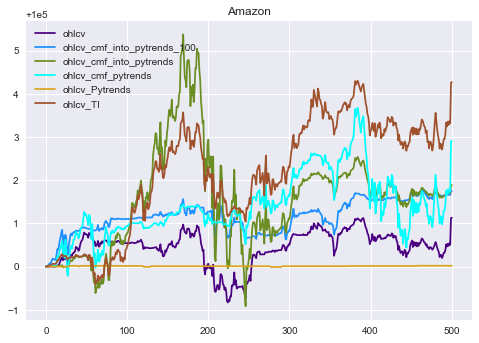

In [4]:
plot_results('Amazon_acc_val')

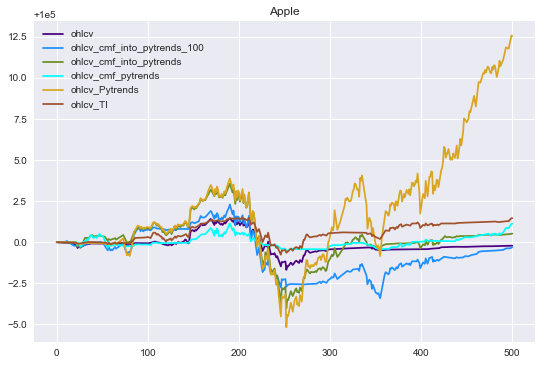

In [106]:
plot_results('Apple_acc_val')

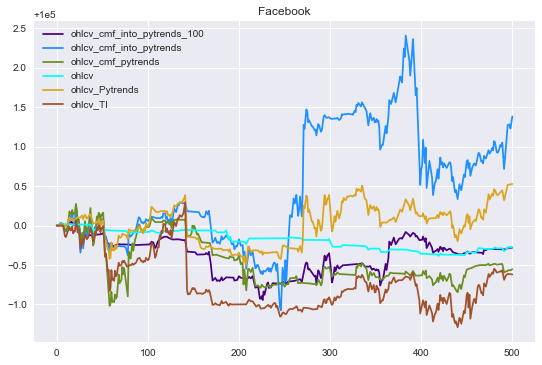

In [107]:
plot_results('Facebook_acc_val')

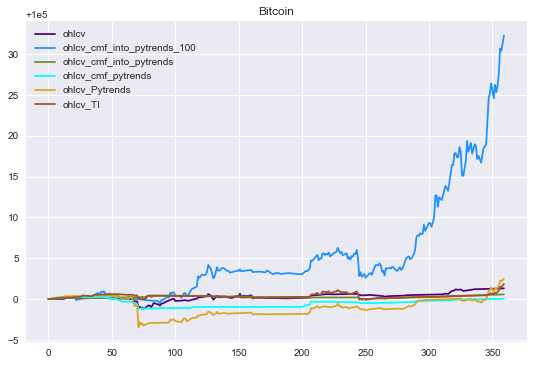

In [108]:
plot_results('Bitcoin_acc_val')


In [2]:
from pyfolio import timeseries
from copy import deepcopy


def get_daily_return(df, value_col_name="total_assets"):
    df = deepcopy(df)
    df["daily_return"] = df[value_col_name].pct_change(1)
    df["date"] = pd.to_datetime(df["date"])
    df.set_index("date", inplace=True, drop=True)
    df.index = df.index.tz_localize("UTC")
    return pd.Series(df["daily_return"], index=df.index)


def backtest_stats(account_value, value_col_name="total_assets"):
    dr_test = get_daily_return(account_value, value_col_name=value_col_name)
    perf_stats_all = timeseries.perf_stats(
        returns=dr_test,
        positions=None,
        transactions=None,
        turnover_denom="AGB",
    )
    # print(perf_stats_all)
    return perf_stats_all


C:\Users\astar\anaconda3\envs\PyTorch\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(
